     POS             PLAYER         TEAM  MATCHES  INN  RUNS      SR
0      1       Rohit Sharma        India        9    9   648   98.33
1      2       David Warner    Australia       10   10   647   89.36
2      3    Shakib Al Hasan   Bangladesh        8    8   606   96.04
3      4           Joe Root      England       10   10   549   92.89
4      5    Kane Williamson  New Zealand        9    8   548   76.32
..   ...                ...          ...      ...  ...   ...     ...
142  143    Kane Richardson    Australia        2    1     1  100.00
143  144      Kuldeep Yadav        India        7    2     1   50.00
144  145  Mustafizur Rahman   Bangladesh        8    4     1   14.29
145  146      Nuwan Pradeep    Sri Lanka        3    3     1    8.33
146  147     Shaheen Afridi     Pakistan        5    2     1   16.67

[147 rows x 7 columns]


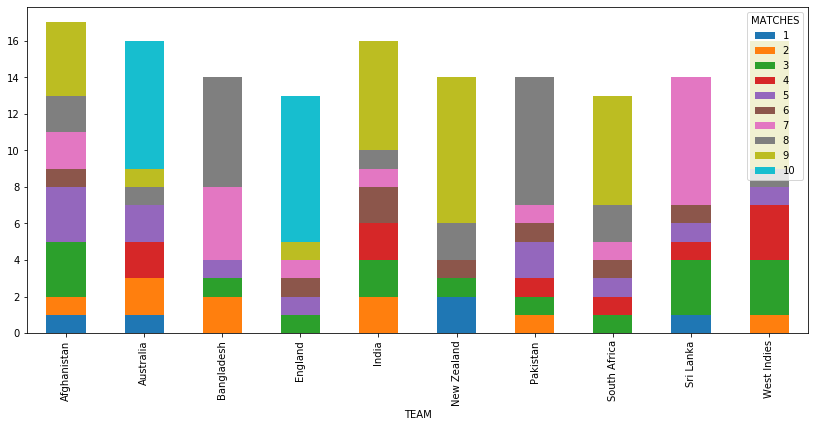

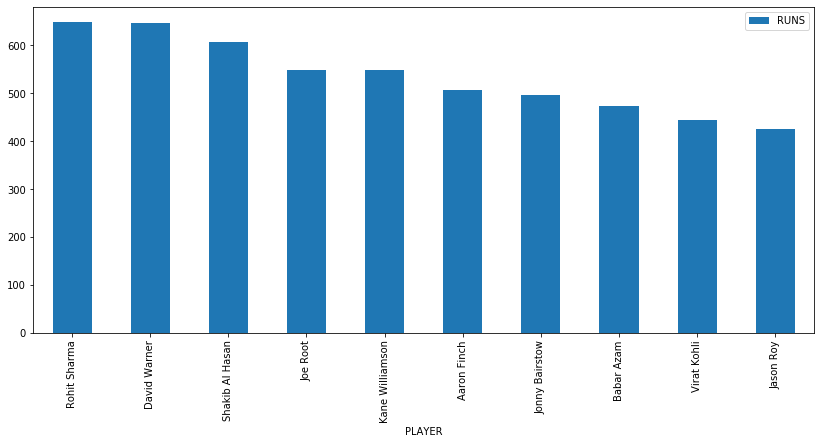

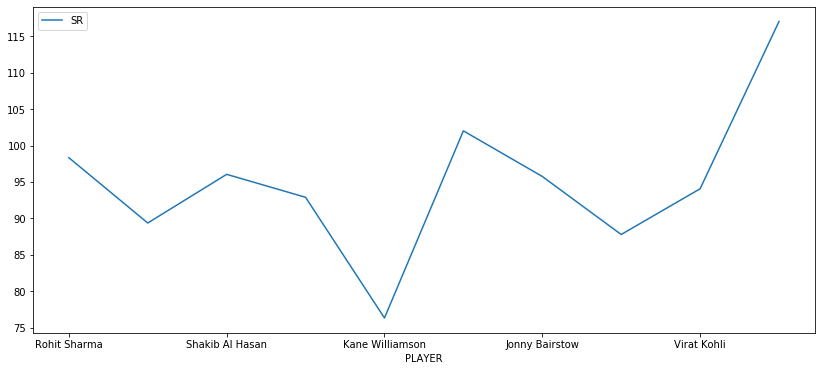

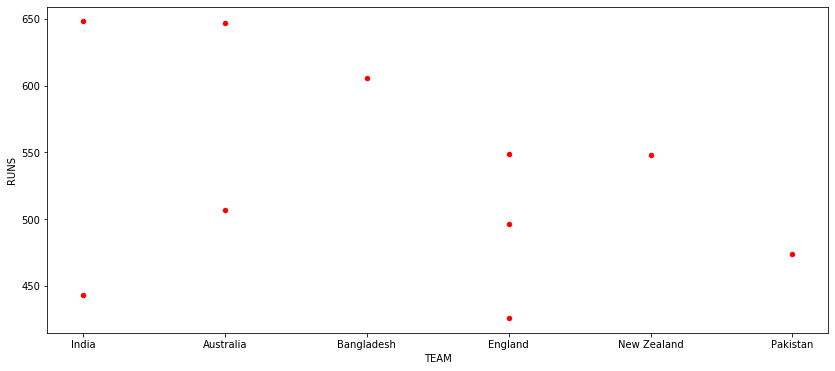

In [29]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://www.mykhel.com/cricket/icc-cricket-world-cup-2019-stats-s1/#ODI#tab-mostrun'
response = requests.get(url)
soup = ''
if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')
    #print(soup)
    
listing = soup.find_all('table', class_= 'cricket-performanceTable odi')
#print(listing[0])

rank= []
poets = listing[0].find_all('tr')
#print(poets[0])
#print(poets[1])


head=[]
rank= []
for player in poets:
    header = player.find_all('th')
    if header != []  :
        #mm0=player.find_all('th')[0].text.strip()
        #mm1=player.find_all('th')[2].text.strip()
        #mm2=player.find_all('th')[3].text.strip()
        #mm3=player.find_all('th')[4].text.strip()
        #mm4=player.find_all('th')[5].text.strip()
        #mm5=player.find_all('th')[6].text.strip()
        #mm6=player.find_all('th')[7].text.strip()
        
        #head.extend([mm0,mm1,mm2,mm3,mm4,mm5,mm6])
        continue
    else:
        a=player.find_all('td')[0].text.strip()
        b=player.find_all('td')[2].text.strip()
        c=player.find_all('td')[3].text.strip()
        d=player.find_all('td')[4].text.strip()
        e=player.find_all('td')[5].text.strip()
        f=player.find_all('td')[6].text.strip()
        g=player.find_all('td')[7].text.strip()
        rank.append([a,b,c,d,e,f,g])
#print(head)
#print(rank)


with open ('cricket_worldcup.json', 'w', encoding='utf-8') as file:
    json.dump(rank, file, ensure_ascii=False, indent=3)

data =''
with open('cricket_worldcup.json', 'r', encoding='utf-8') as r:
    data =json.load(r)



df = pd.read_json('cricket_worldcup.json')
df.rename(columns = {0:"POS", 1:"PLAYER",2:"TEAM",3:"MATCHES",4:"INN",5:"RUNS",6:"SR"}, inplace=True)

print(df)

#Graph no.1 
df.groupby(['TEAM','MATCHES']).size().unstack().plot(kind='bar',stacked=True, figsize=(14,6))
plt.show()

df_top10 = df[(df['POS'] > 0) & (df['POS'] < 11)]
df_top10

#Graph no.2
df_top10.plot(kind='bar',x='PLAYER',y='RUNS', figsize=(14,6))
plt.show()
#Graph no.3
ax = plt.gca()

df_top10.plot(kind='line',x='PLAYER',y='SR',ax=ax, figsize=(14,6))
plt.show()

#Graph no.4
df_top10.plot(kind='scatter',x='TEAM',y='RUNS',color='red',figsize=(14,6))
plt.show()
